In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image


In [17]:

base_dir = "/content/drive/MyDrive/food/data/food-101-tiny"
train_dir = os.path.join(base_dir, "/content/drive/MyDrive/food/data/food-101-tiny/train")
test_dir = os.path.join(base_dir, "/content/drive/MyDrive/food/data/food-101-tiny/valid")


food_classes = [
    "apple_pie", "tiramisu", "bibimbap", "cannoli", "ramen",
    "ice_cream", "french_toast", "sushi", "falafel", "edamame"
]
num_classes = len(food_classes)


In [18]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest"
)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', classes=food_classes
)


test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False, classes=food_classes
)


Found 1500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [19]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,518,602 (24.87 MB)

 Trainable params: 6,518,602 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
EPOCHS = 50

BATCH_SIZE = 16





history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,

    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step - accuracy: 0.6059 - loss: 1.0818 - val_accuracy: 0.5100 - val_loss: 2.7802
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 434ms/step - accuracy: 0.6199 - loss: 1.0503 - val_accuracy: 0.5140 - val_loss: 2.7554
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 376ms/step - accuracy: 0.6025 - loss: 1.1096 - val_accuracy: 0.4820 - val_loss: 2.9564
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 438ms/step - accuracy: 0.6167 - loss: 1.0620 - val_accuracy: 0.4940 - val_loss: 3.1055
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 440ms/step - accuracy: 0.6300 - loss: 1.0274 - val_accuracy: 0.4940 - val_loss: 3.1763
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 386ms/step - accuracy: 0.6514 - loss: 1.0097 - val_accuracy: 0.5100 - val_loss: 2.7445
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 387ms/step - accuracy: 0.6302 - loss: 1.0457 - val_accuracy: 0.4940 - val_loss: 2.7316
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 377ms/step - accuracy: 0.6149 - loss: 1.0525 - val_accu

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.4039 - loss: 8.0078
Test Accuracy: 50.20%


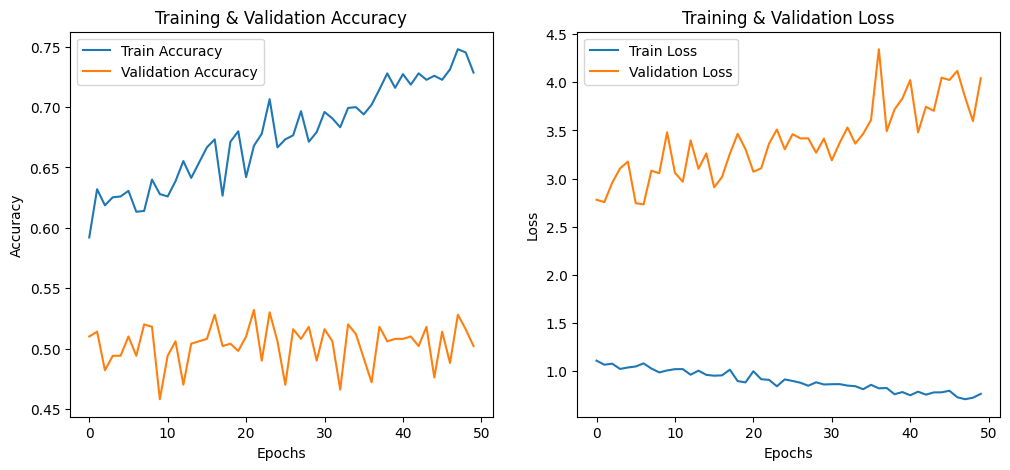

In [46]:

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")


plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")

plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   apple_pie       0.00      0.00      0.00        50
    tiramisu       0.47      0.54      0.50        50
    bibimbap       0.33      0.80      0.46        50
     cannoli       0.48      0.46      0.47        50
       ramen       0.64      0.56      0.60        50
   ice_cream       0.52      0.34      0.41        50
french_toast       0.39      0.70      0.50        50
       sushi       0.73      0.32      0.44        50
     falafel       0.49      0.34      0.40        50
     edamame       1.00      0.96      0.98        50

    accuracy                           0.50       500
   macro avg       0.50      0.50      0.48       500
weighted avg       0.50      0.50      0.48       500



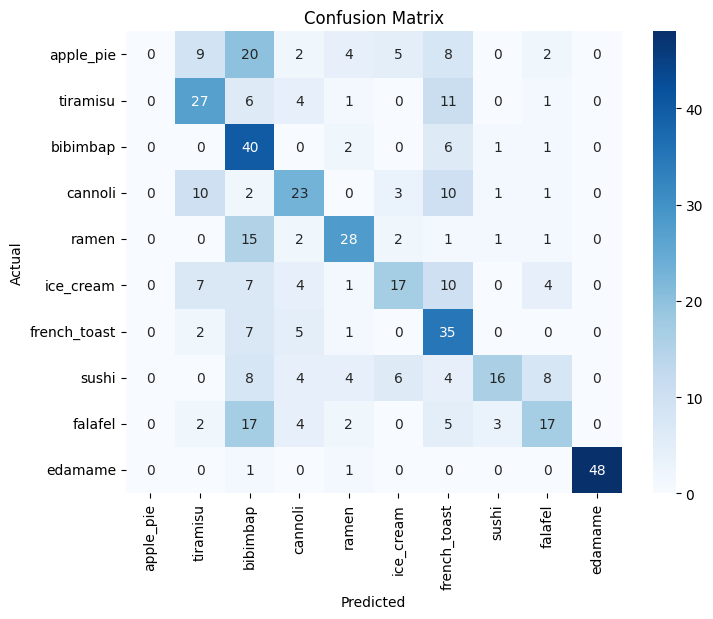

In [47]:

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes


print(classification_report(y_true, y_pred, target_names=food_classes))


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=food_classes, yticklabels=food_classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


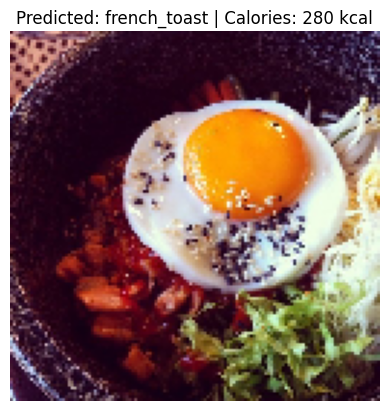

Predicted Food: french_toast, Estimated Calories: 280 kcal


In [49]:

food_calories = {
    "apple_pie": 250, "tiramisu": 450, "bibimbap": 550, "cannoli": 230,
    "ramen": 450, "ice_cream": 207, "french_toast": 280,
    "sushi": 200, "falafel": 333, "edamame": 120
}


def predict_food_and_calories(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    food_label = food_classes[class_index]
    calorie_value = food_calories.get(food_label, "Unknown")


    plt.imshow(img)
    plt.title(f"Predicted: {food_label} | Calories: {calorie_value} kcal")
    plt.axis("off")
    plt.show()

    return food_label, calorie_value


random_food = random.choice(food_classes)
food_path = os.path.join(test_dir, random_food)
random_image = random.choice(os.listdir(food_path))
image_path = os.path.join(food_path, random_image)


predicted_label, estimated_calories = predict_food_and_calories(image_path)
print(f"Predicted Food: {predicted_label}, Estimated Calories: {estimated_calories} kcal")


In [34]:
model.save("final_food_calorie_model.h5")
print("Model saved successfully!")


Model saved successfully!
